# Pb remediation case study

Elvis Eugene, William Phillip, Alexander Dowling

Scripts to generate results for the Pb remediation case study in _**Material property targets to enable adsorptive water treatment and resource recovery systems**_

#### Load  libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import multiscale_adsorption_target_models as mat # python model and workflow functions

#### Define constant parameters for Pb remediation study

In [2]:
cin_ppb = 100 # [ppb] 
# Lead concentration in Flint Michigan water 
# ref: 1) https://www.mlive.com/news/flint/2016/03/some_flint_water_test_sites_st.html
# 2) doi: 10.1021/acsami.7b04603

clim_ppb = 15 # [ppb] EPA limits for lead concentration in drinking water
# Ref: https://www.epa.gov/ground-water-and-drinking-water/national-primary-drinking-water-regulations#seven
# accessed 28-Aug-2019

mw_Pb = 207.2e-3; # [g/mmol] Molecular mass of 1 mmol of lead i.e. target solute / contaminant

rho_Pb = 11.34; # [g/cm3] Density of lead i.e. target solute / contaminant

# molar volume of Pb [cm3/mmol]
v_s_bar_Pb = mw_Pb/rho_Pb;

# pressure drop
delP_psi = 65 # psi
delP_Pb = delP_psi * 6894.76 # Pa

# membrane thickness
l_mem_baseline = 1e-3 # m (1 mm)
l_mem_opt = 2e-4 # m (0.2 mm)

# mass for contours
m_mem = np.array([1, 10, 25, 50, 100, 1000]) # kg

# convert to mmol/cm3 units
cin_Pb = cin_ppb/mw_Pb/1e6 #[mmol/cm3]
clim_Pb = clim_ppb/mw_Pb/1e6 #[mmol/cm3]

# calculate removal ratio
removal_ratio = cin_Pb / clim_Pb 

# path to existing adsorbent data
path = 'sorbent_prop.csv'

# sorbent properties
eps_mem = 0.3 # [-*], membrane porosity
eps_bed = 0.4 # [-*], packed bed void fraction
eps_part = 0.57 # [-*], porosity of particle
rho_mat = 1 # g cm-3, density of sorbent matrix

## Case 1: Regenerate once in 2 years

#### Define parameters

In [3]:
v_total_case1 = 60 # m3, volume of water to be treated
t_total_case1 = np.array([2*365*24*60*60]) # s, time available for treatment
case1_name = 'Pb_case1' # unique identifier for this case

#### Calculate material property targets and membrane-based limits on material properties

In [4]:
# baseline targets and limits
K, QC_Pb, K_qmax, qmax, QB_Pb = mat.calc_lead_targets(cin_Pb, v_s_bar_Pb, delP_Pb, l_mem_baseline, eps_mem, m_mem,
v_total_case1, t_total_case1, batch_targets=True, removal_ratio=removal_ratio,
print_level=0, calc_masses=True,
path=path, casename=case1_name)

# optimized limits (targets are unchanged)
__, __, K_qmax_opt, qmax_opt = mat.calc_lead_targets(cin_Pb, v_s_bar_Pb, delP_Pb, l_mem_opt, eps_mem, m_mem,
v_total_case1, t_total_case1, batch_targets=False, removal_ratio=removal_ratio,
print_level=0, calc_masses=False,
path=path, casename=case1_name)

Saved semicontinuous material requirements to semicont_material_requirements_Pb_case1.csv
Saved batch material requirements to batch_material_requirements_Pb_case1.csv


#### Calculate packed-bed design criteria

In [5]:
mat.qmax_heatmaps(case1_name,eps_bed,eps_part,eps_mem,cin_Pb,v_s_bar_Pb,v_total_case1,t_total_case1,delP_Pb,
                  plot_existing=False,K_exist=None,Q_exist=None,d_pore_min_max=[1e-7,1e-5],
                  d_pore_mem_min_max=[1e-7,1e-5],plot_contours=False)

Saved K values to Pb_case1K_x.csv
Saved Q values to Pb_case1Q_y.csv
Saved lub_bar values to Pb_case1lub_bar.csv


#### Plot MPT contours with membrane limits
This code generates Fig 3A of the manuscript

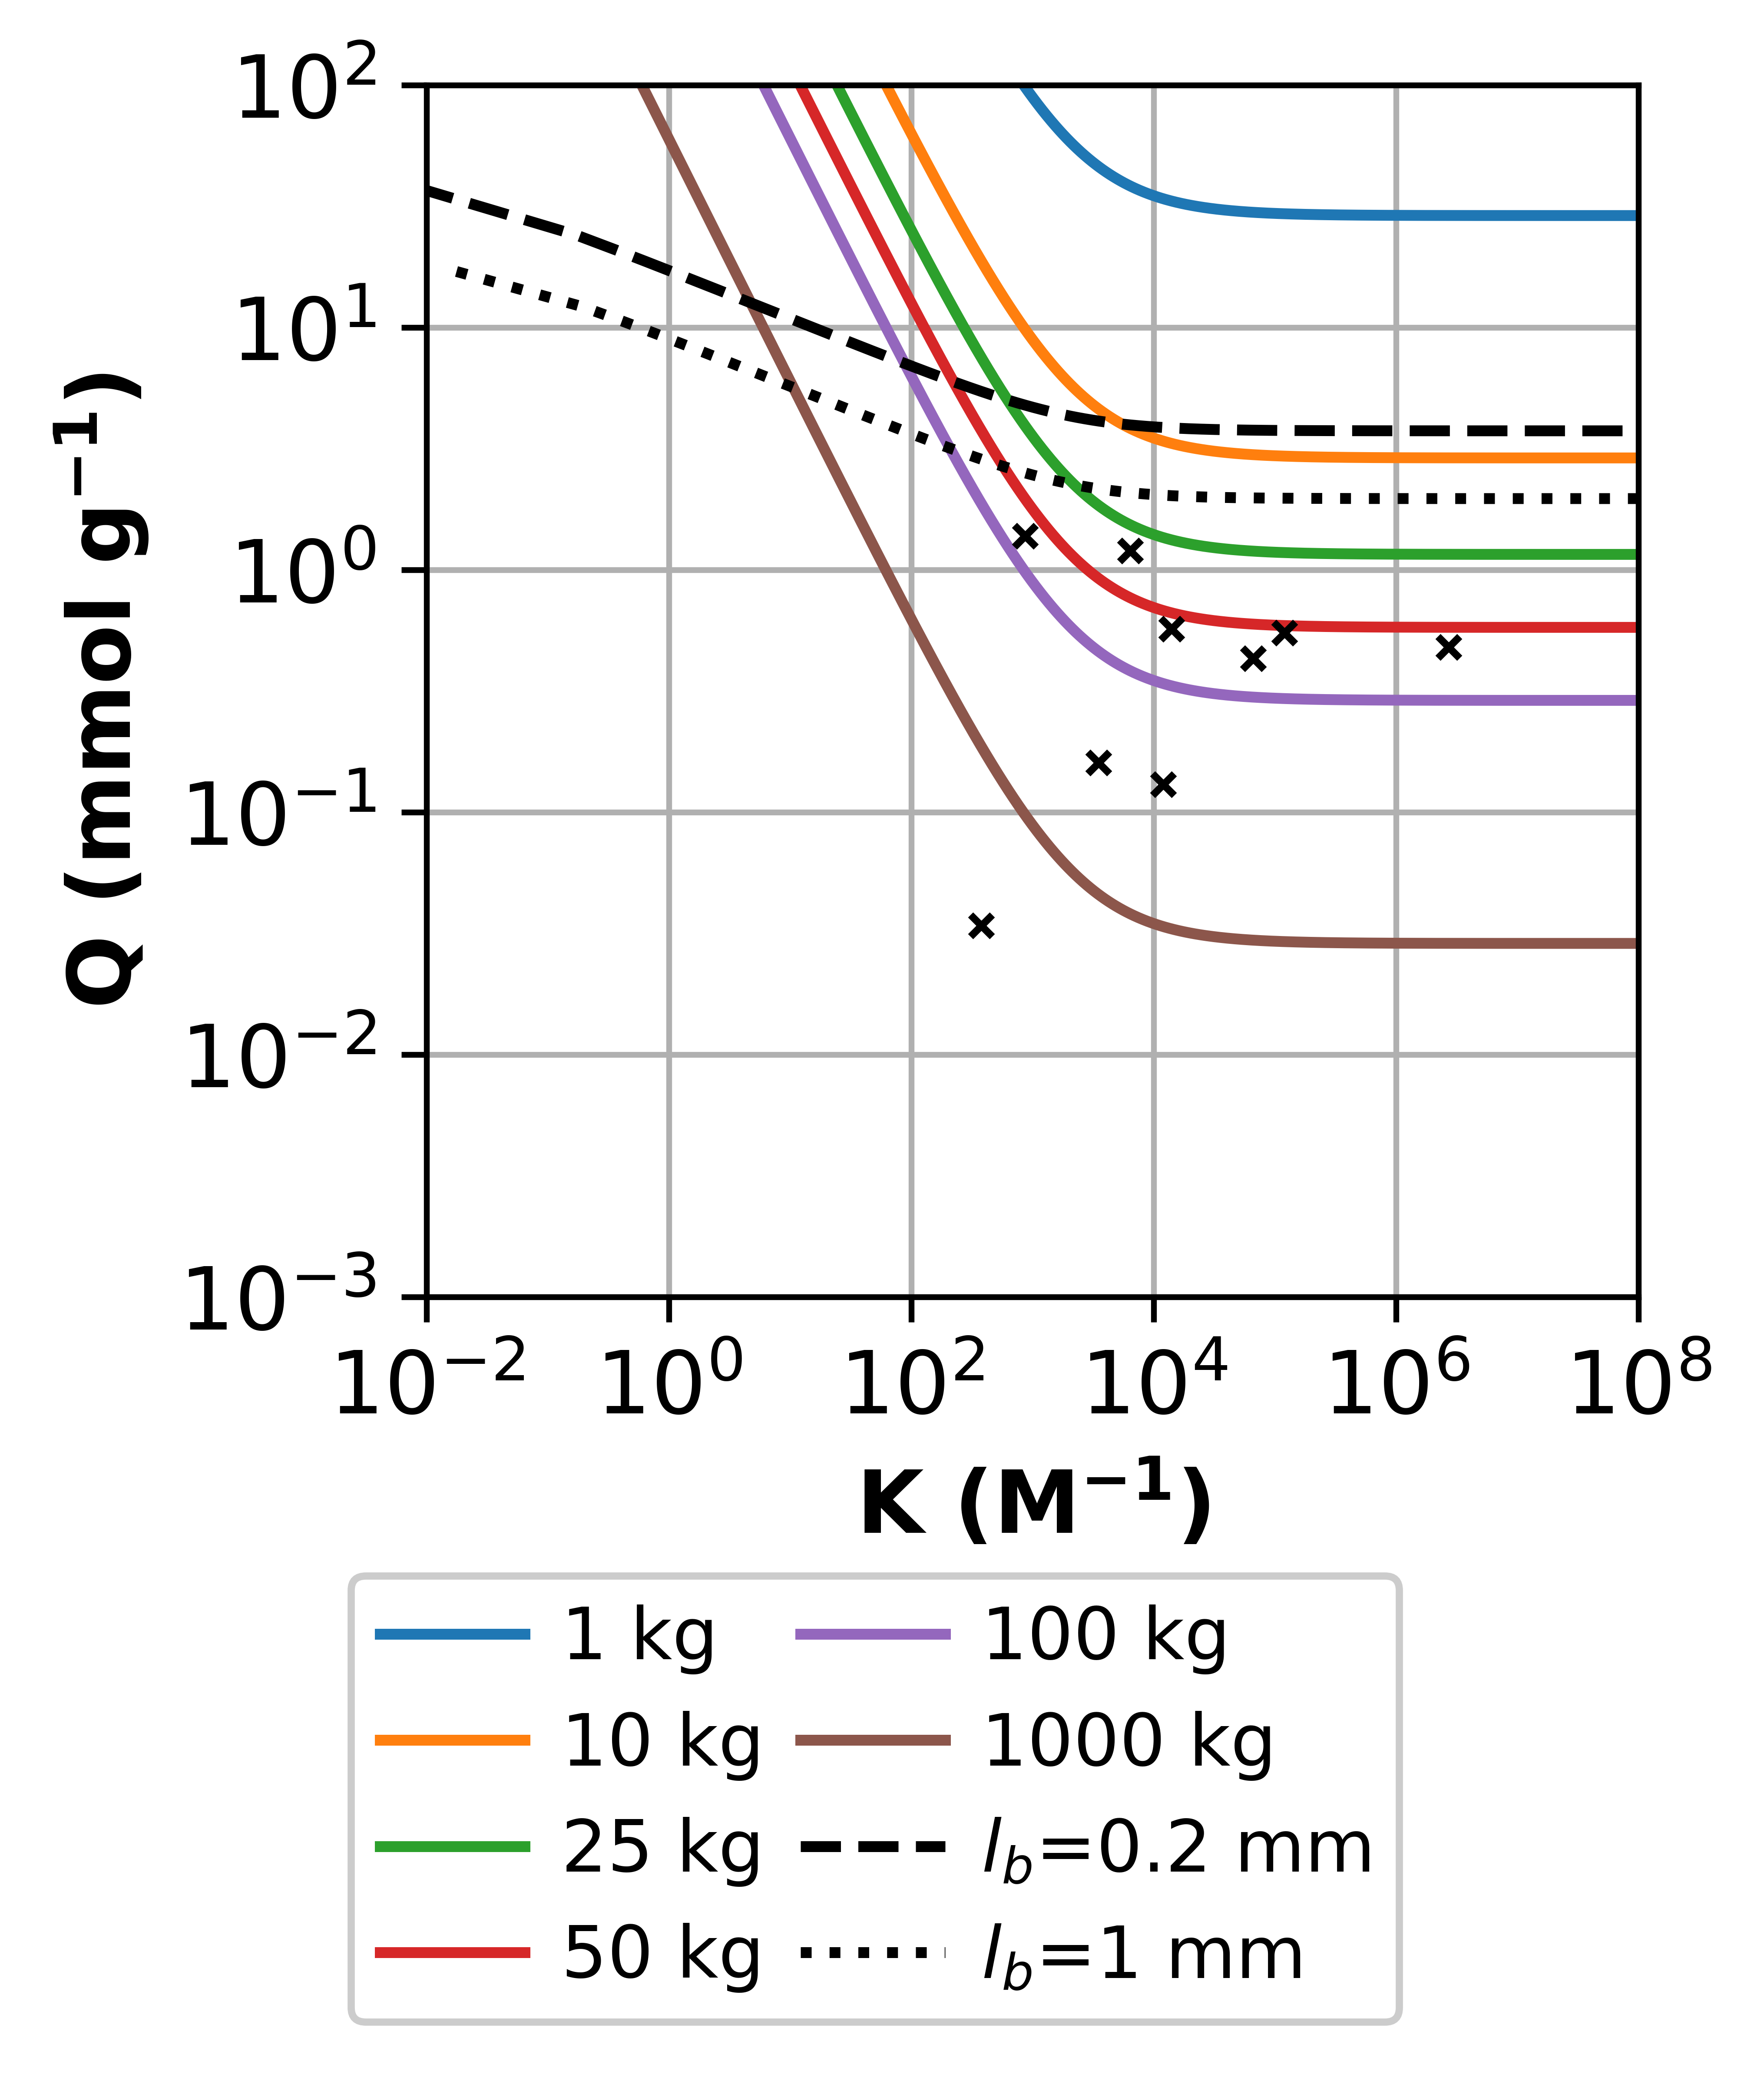

In [6]:
# assemble np.arrays for binding affinity and saturation capacity limits [baseline, optimized]
K_qmax_plot = np.array([K_qmax_opt[0,:],K_qmax[0,:]])
qmax_plot = np.array([qmax_opt[0,:],qmax[0,:]])

# define figure name
figname = case1_name+'membrane'

fig_Pb_case1_mem, ax_Pb_case1_mem = mat.plot_lead_targets(K, QC_Pb, K_qmax_plot, qmax_plot, m_mem, cin_Pb, eps_mem, 
                                                          v_total_case1, t_total_case1, path, figname, 
                                                          rho_mat = rho_mat, print_level=0, 
                                                          dimensionless=False, pbed_qmax_path=None,
                                                          pb_labels=None,combined_plot=False, 
                                                          mem_Qmax_labels=['0.2 mm','1 mm'])

# adjust axis limits
ax_Pb_case1_mem.set_yticks([1e-3,1e-2,1e-1,1e0,1e1,1e2])
ax_Pb_case1_mem.set_xticks([1e-2,1e0,1e2,1e4,1e6,1e8])
ax_Pb_case1_mem.tick_params(labelsize=12)
ax_Pb_case1_mem.set_xlim(1e-2,1e8)
ax_Pb_case1_mem.set_ylim(1e-3,1e2)

# square aspect ratio
mat.set_aspect_ratio_log(ax_Pb_case1_mem, 1.0)

# save plot to file
plt.savefig(figname+'.png',dpi=300,bbox_inches='tight')

#### Plot MPT contours with packed bed limits
This code generates Fig 3B of the manuscript

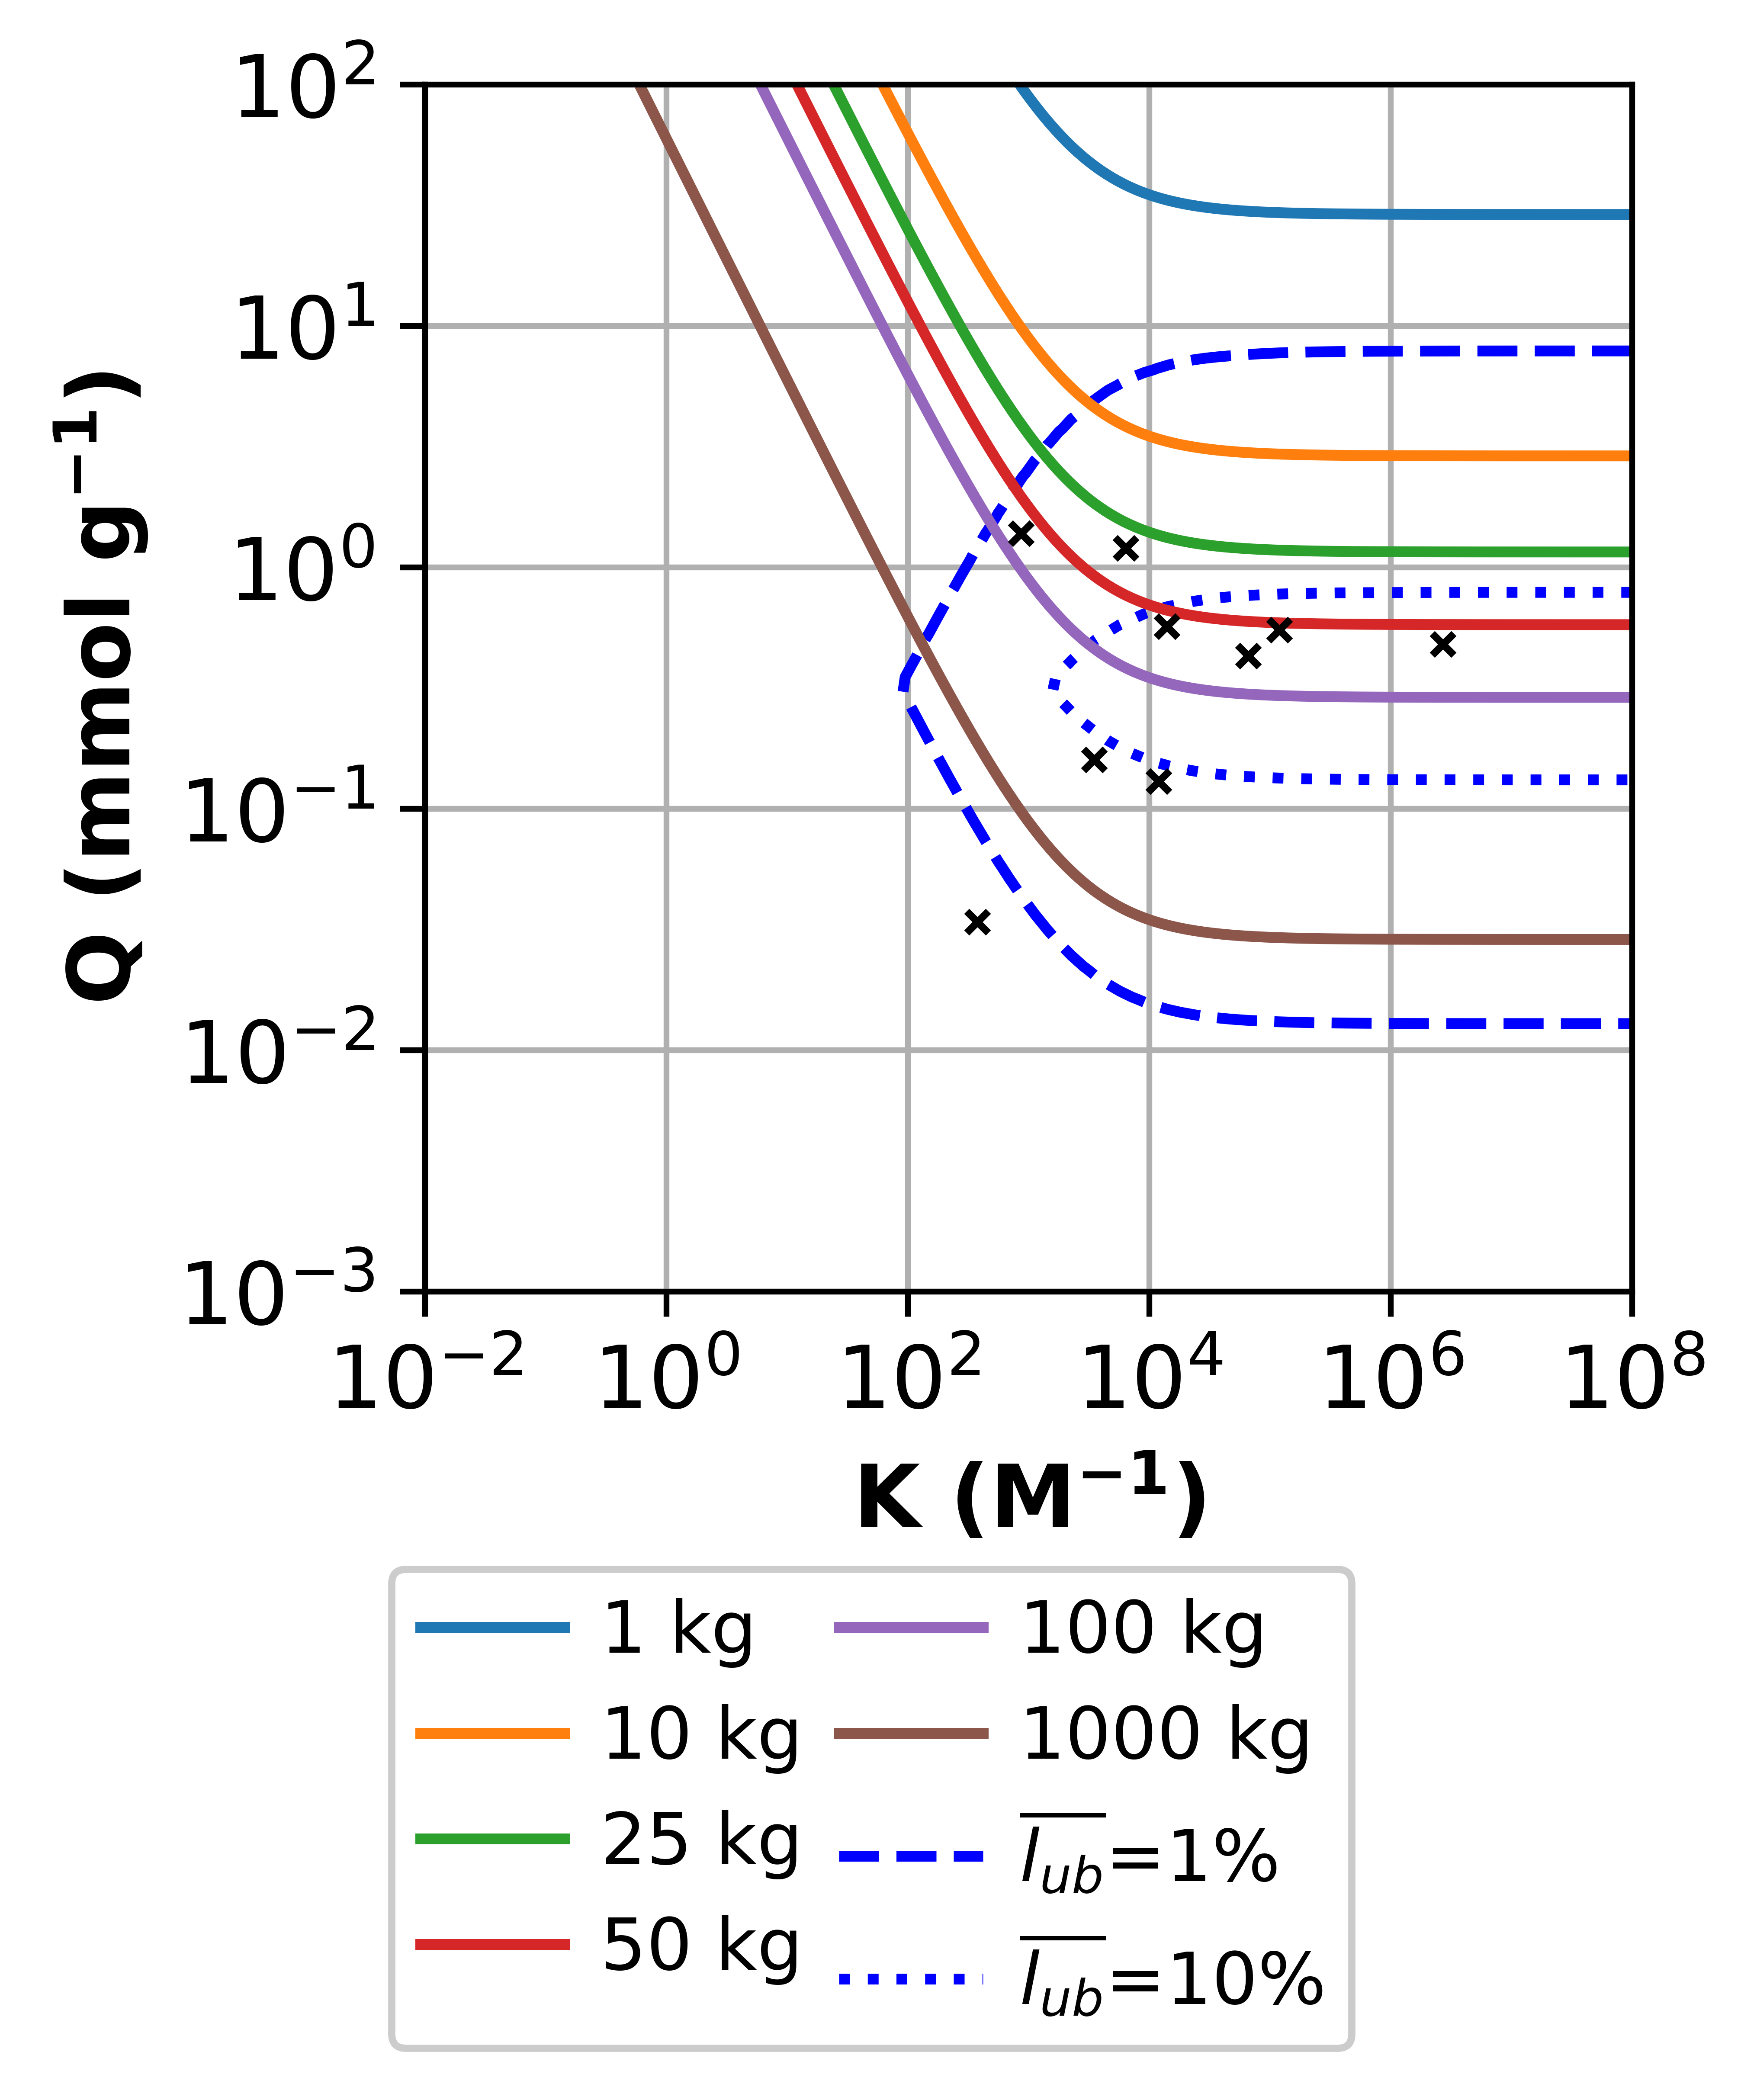

In [7]:
# define figure name
figname = case1_name+'packed_bed'

fig_Pb_case1_packedbed, ax_Pb_case1_packedbed = mat.plot_lead_targets(K, QC_Pb, K_qmax_plot, qmax_plot, m_mem, cin_Pb, eps_mem, 
                                                          v_total_case1, t_total_case1, path, figname, 
                                                          rho_mat = rho_mat, print_level=0, 
                                                          dimensionless=False, pbed_qmax_path=case1_name,
                                                          pb_labels=None,combined_plot=False, 
                                                          mem_Qmax_labels=None)

# adjust axis limits
ax_Pb_case1_packedbed.set_yticks([1e-3,1e-2,1e-1,1e0,1e1,1e2])
ax_Pb_case1_packedbed.set_xticks([1e-2,1e0,1e2,1e4,1e6,1e8])
ax_Pb_case1_packedbed.set_xlim(1e-2,1e8)
ax_Pb_case1_packedbed.set_ylim(1e-3,1e2)

# square aspect ratio
mat.set_aspect_ratio_log(ax_Pb_case1_packedbed, 1.0)

# save plot to file
plt.savefig(figname+'.png',dpi=300,bbox_inches='tight')

## Case 2: Regenerate once in 6 months

#### Define parameters

In [8]:
v_total_case2 = v_total_case1/4 # m3, volume of water to be treated
t_total_case2 = t_total_case1/4 # s, time available for treatment
case2_name = 'Pb_case2' # unique identifier for this case

#### Calculate material property targets and membrane-based limits on material properties

In [9]:
# baseline targets and limits
K, QC_Pb, K_qmax, qmax, QB_Pb = mat.calc_lead_targets(cin_Pb, v_s_bar_Pb, delP_Pb, l_mem_baseline, eps_mem, m_mem,
v_total_case2, t_total_case2, batch_targets=True, removal_ratio=removal_ratio,
print_level=0, calc_masses=True,
path=path, casename=case2_name)

# optimized limits (targets are unchanged)
__, __, K_qmax_opt, qmax_opt = mat.calc_lead_targets(cin_Pb, v_s_bar_Pb, delP_Pb, l_mem_opt, eps_mem, m_mem,
v_total_case2, t_total_case2, batch_targets=False, removal_ratio=removal_ratio,
print_level=0, calc_masses=False,
path=path, casename=case2_name)

Saved semicontinuous material requirements to semicont_material_requirements_Pb_case2.csv
Saved batch material requirements to batch_material_requirements_Pb_case2.csv


#### Calculate packed-bed design criteria

In [10]:
mat.qmax_heatmaps(case2_name,eps_bed,eps_part,eps_mem,cin_Pb,v_s_bar_Pb,v_total_case2,t_total_case2,delP_Pb,
                  plot_existing=False,K_exist=None,Q_exist=None,d_pore_min_max=[1e-7,1e-5],
                  d_pore_mem_min_max=[1e-7,1e-5],plot_contours=False)

Saved K values to Pb_case2K_x.csv
Saved Q values to Pb_case2Q_y.csv
Saved lub_bar values to Pb_case2lub_bar.csv


#### Plot MPT contours with membrane limits
This code generates Fig 3C of the manuscript

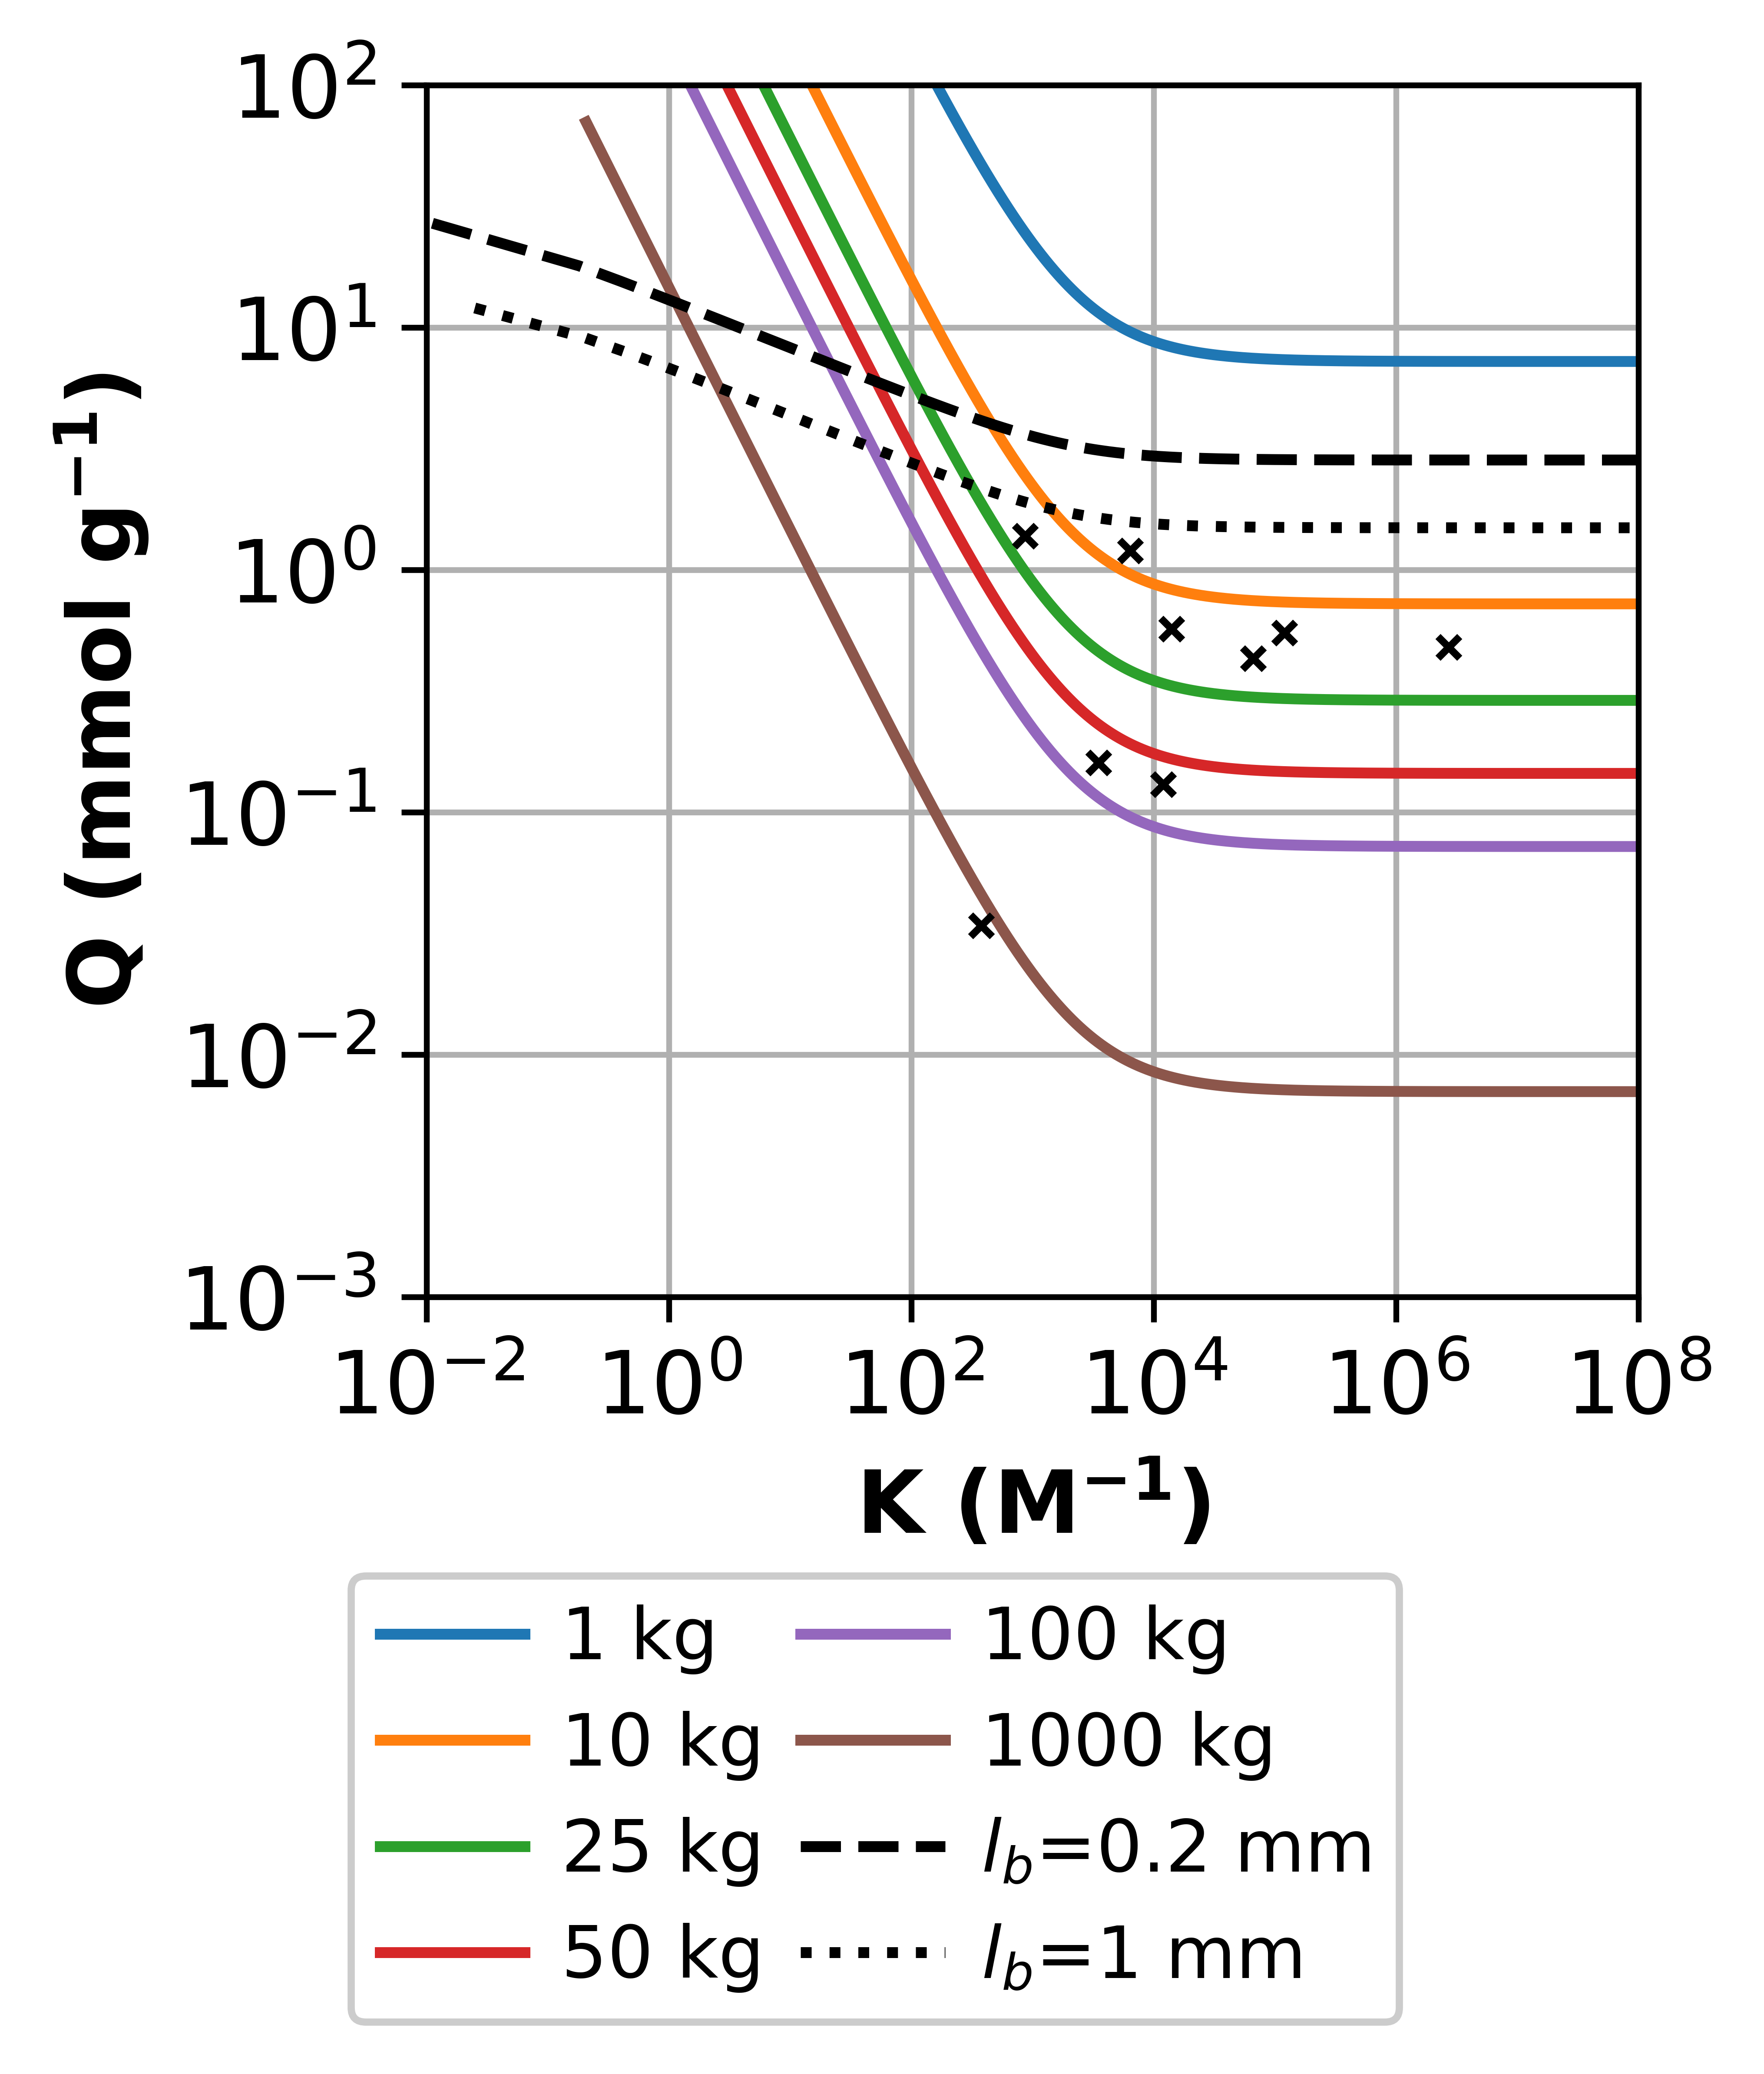

In [11]:
# assemble np.arrays for binding affinity and saturation capacity limits [baseline, optimized]
K_qmax_plot = np.array([K_qmax_opt[0,:],K_qmax[0,:]])
qmax_plot = np.array([qmax_opt[0,:],qmax[0,:]])

# define figure name
figname = case2_name+'membrane'

fig_Pb_case2_mem, ax_Pb_case2_mem = mat.plot_lead_targets(K, QC_Pb, K_qmax_plot, qmax_plot, m_mem, cin_Pb, eps_mem, 
                                                          v_total_case2, t_total_case2, path, figname, 
                                                          rho_mat = rho_mat, print_level=0, 
                                                          dimensionless=False, pbed_qmax_path=None,
                                                          pb_labels=None,combined_plot=False, 
                                                          mem_Qmax_labels=['0.2 mm','1 mm',])

# adjust axis limits
ax_Pb_case2_mem.set_yticks([1e-3,1e-2,1e-1,1e0,1e1,1e2])
ax_Pb_case2_mem.set_xticks([1e-2,1e0,1e2,1e4,1e6,1e8])
ax_Pb_case2_mem.tick_params(labelsize=12)
ax_Pb_case2_mem.set_xlim(1e-2,1e8)
ax_Pb_case2_mem.set_ylim(1e-3,1e2)

# square aspect ratio
mat.set_aspect_ratio_log(ax_Pb_case2_mem, 1.0)

# save plot to file
plt.savefig(figname+'.png',dpi=300,bbox_inches='tight')

#### Plot MPT contours with packed bed limits
This code generates Fig 3D of the manuscript

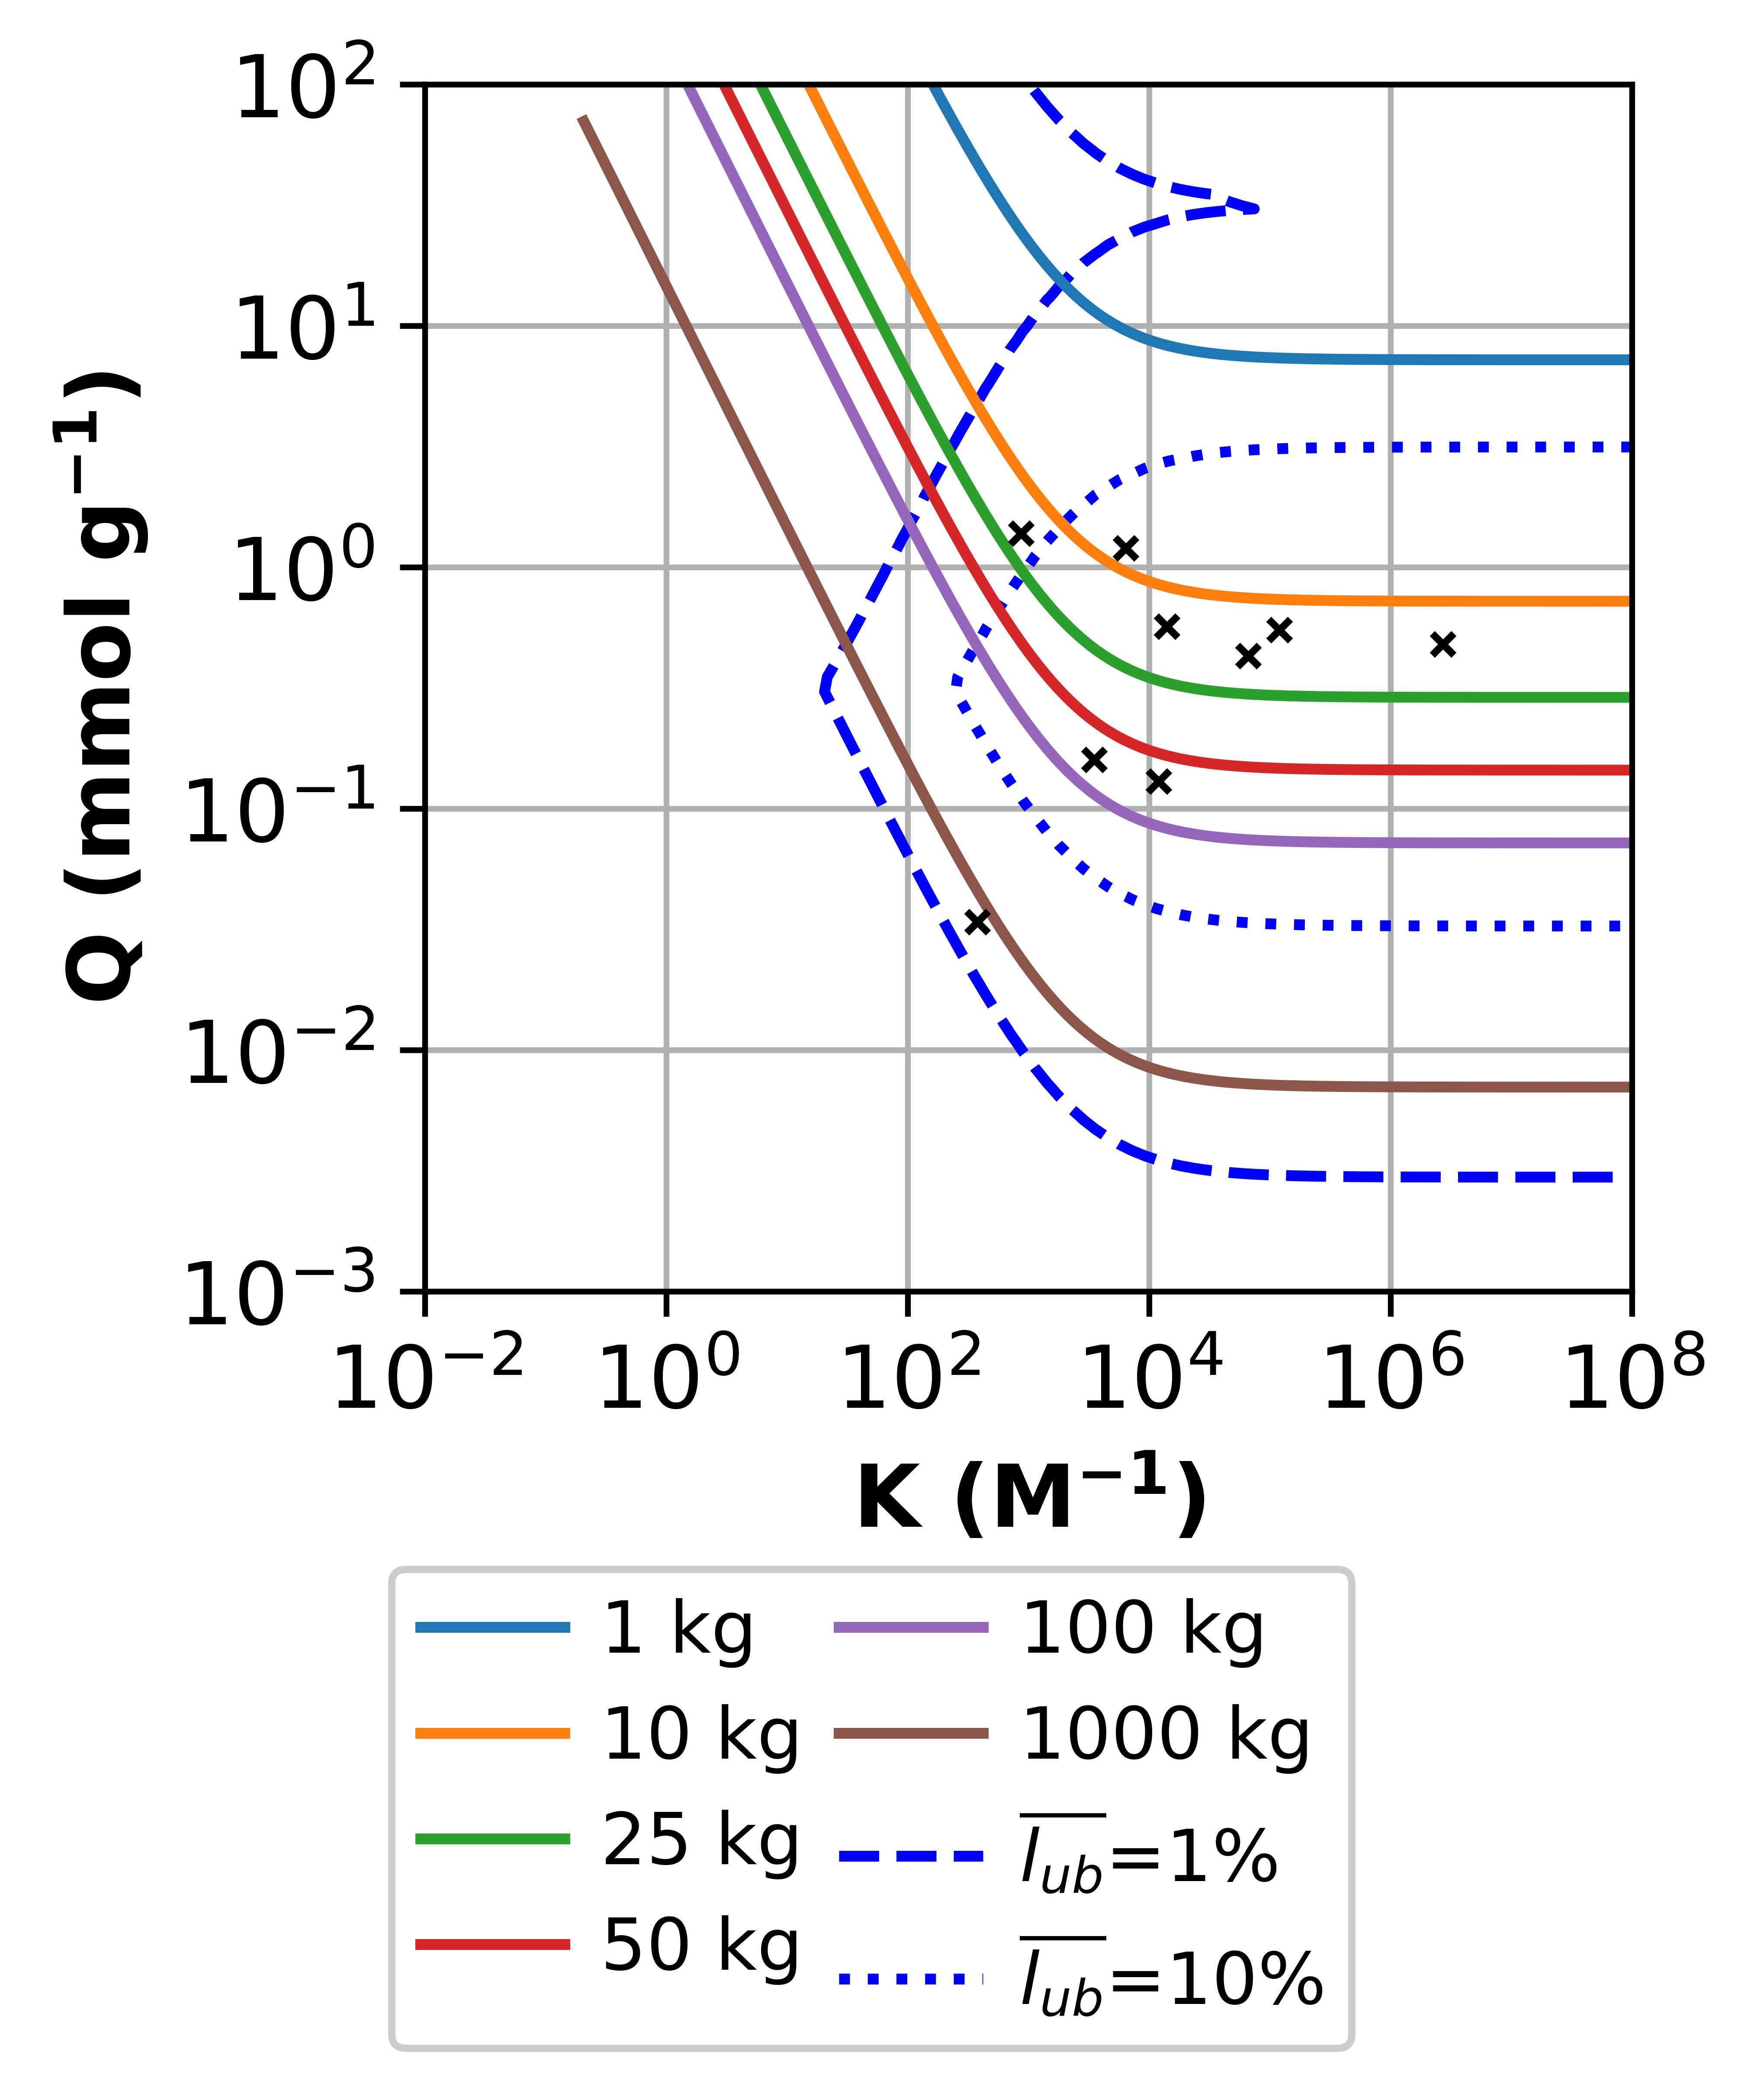

In [12]:
# define figure name
figname = case2_name+'packed_bed'

fig_Pb_case2_packedbed, ax_Pb_case2_packedbed = mat.plot_lead_targets(K, QC_Pb, K_qmax_plot, qmax_plot, m_mem, cin_Pb, eps_mem, 
                                                          v_total_case2, t_total_case2, path, figname, 
                                                          rho_mat = rho_mat, print_level=0, 
                                                          dimensionless=False, pbed_qmax_path=case2_name,
                                                          pb_labels=None,combined_plot=False, 
                                                          mem_Qmax_labels=None)

# adjust axis limits
ax_Pb_case2_packedbed.set_yticks([1e-3,1e-2,1e-1,1e0,1e1,1e2])
ax_Pb_case2_packedbed.set_xticks([1e-2,1e0,1e2,1e4,1e6,1e8])
ax_Pb_case2_packedbed.set_xlim(1e-2,1e8)
ax_Pb_case2_packedbed.set_ylim(1e-3,1e2)

# square aspect ratio
mat.set_aspect_ratio_log(ax_Pb_case2_packedbed, 1.0)

# save plot to file
plt.savefig(figname+'.png',dpi=300,bbox_inches='tight')